### PREDICTING COUPON REDEMPTION

In [1]:
import numpy as np 
import pandas as pd

In [2]:
campaign = pd.read_csv("campaign_data.csv")

In [3]:
coupon = pd.read_csv("coupon_item_mapping.csv")

In [4]:
demographics = pd.read_csv("customer_demographics.csv")

In [5]:
transaction = pd.read_csv("customer_transaction_data.csv")

In [6]:
item = pd.read_csv("item_data.csv")

In [7]:
campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [8]:
coupon.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [9]:
demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [11]:
transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [12]:
item.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [13]:
test = pd.read_csv("test.csv")

In [14]:
train = pd.read_csv("train.csv")

In [15]:
len(train)

78369

In [16]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [18]:
train["redemption_status"].unique()

array([0, 1])

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

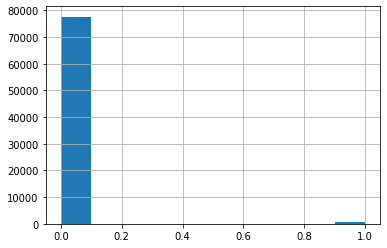

In [22]:
train['redemption_status'].hist()

### Creating Consolidated Customer View

In [23]:
transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [24]:
demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [25]:
cust_data = pd.merge( transaction, demographics,how="left", on="customer_id")

In [27]:
cust_data.tail()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0,70+,NaN,0.0,2,NaN,9.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0,70+,NaN,0.0,2,NaN,9.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0,70+,NaN,0.0,2,NaN,9.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0,70+,NaN,0.0,2,NaN,9.0
1324565,2013-06-30,1129,64498,2,489.78,0.00,0.0,70+,NaN,0.0,2,NaN,9.0


In [28]:
len(cust_data)

1324566

In [30]:
len(test) +len(train)

128595

In [33]:
pd.set_option("display.max_columns", 500)

In [34]:
item.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [35]:
cust_item_data = pd.merge(cust_data, item, how="left", on="item_id")

In [36]:
cust_item_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,age_range,marital_status,rented,family_size,no_of_children,income_bracket,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,NaN,NaN,NaN,NaN,NaN,NaN,56,Local,Natural Products
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,NaN,NaN,NaN,NaN,NaN,NaN,56,Local,Natural Products
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,524,Established,Grocery
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1134,Established,Grocery
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,524,Established,Grocery


### Creating consolidated campaign view

In [41]:
coupon.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [43]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [42]:
item.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [39]:
campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [48]:
from datetime import datetime

In [99]:
pd.to_datetime(campaign["end_date"], dayfirst=True) - pd.to_datetime(campaign["start_date"],dayfirst=True)

0    60 days
1    32 days
2    70 days
3    38 days
4    32 days
5    32 days
6    55 days
7    32 days
8    32 days
9    32 days
10   47 days
11   46 days
12   32 days
13   32 days
14   32 days
15   48 days
16   34 days
17   32 days
18   56 days
19   34 days
20   32 days
21   37 days
22   32 days
23   46 days
24   53 days
25   61 days
26   63 days
27   40 days
dtype: timedelta64[ns]

In [97]:
pd.to_datetime(campaign["end_date"],dayfirst=True)

0    2013-12-20
1    2013-11-22
2    2013-11-16
3    2013-11-15
4    2013-10-18
5    2013-10-18
6    2013-10-04
7    2013-09-27
8    2013-08-30
9    2013-08-16
10   2013-07-05
11   2013-06-07
12   2013-05-24
13   2013-05-10
14   2013-04-12
15   2013-04-05
16   2013-03-08
17   2013-03-01
18   2013-02-16
19   2013-02-15
20   2013-02-08
21   2013-01-18
22   2013-01-18
23   2013-01-04
24   2012-11-30
25   2012-11-16
26   2012-10-27
27   2012-09-21
Name: end_date, dtype: datetime64[ns]

In [94]:
pd.to_datetime(campaign["start_date"])

0    2013-10-21
1    2013-10-21
2    2013-07-09
3    2013-08-10
4    2013-09-16
5    2013-09-16
6    2013-10-08
7    2013-08-26
8    2013-07-29
9    2013-07-15
10   2013-05-19
11   2013-04-22
12   2013-04-22
13   2013-08-04
14   2013-11-03
15   2013-02-16
16   2013-02-02
17   2013-01-28
18   2012-12-22
19   2013-12-01
20   2013-07-01
21   2012-12-12
22   2012-12-17
23   2012-11-19
24   2012-08-10
25   2012-09-16
26   2012-08-25
27   2012-12-08
Name: start_date, dtype: datetime64[ns]

28

In [104]:
campaign["duration"] = (pd.to_datetime(campaign["end_date"], dayfirst=True) - \
pd.to_datetime(campaign["start_date"], dayfirst=True))/np.timedelta64(1,'D')

In [105]:
campaign["duration"].head(10)

0    60.0
1    32.0
2    70.0
3    38.0
4    32.0
5    32.0
6    55.0
7    32.0
8    32.0
9    32.0
Name: duration, dtype: float64

In [106]:
campaign.head(10)

,campaign_id,campaign_type,start_date,end_date,duration
0,24,Y,21/10/13,20/12/13,60.0
1,25,Y,21/10/13,22/11/13,32.0
2,20,Y,07/09/13,16/11/13,70.0
3,23,Y,08/10/13,15/11/13,38.0
4,21,Y,16/09/13,18/10/13,32.0
5,22,X,16/09/13,18/10/13,32.0
6,18,X,10/08/13,04/10/13,55.0
7,19,Y,26/08/13,27/09/13,32.0
8,17,Y,29/07/13,30/08/13,32.0
9,16,Y,15/07/13,16/08/13,32.0


In [62]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   campaign_id    28 non-null     int64          
 1   campaign_type  28 non-null     object         
 2   start_date     28 non-null     object         
 3   end_date       28 non-null     object         
 4   duration       28 non-null     timedelta64[ns]
dtypes: int64(1), object(3), timedelta64[ns](1)
memory usage: 1.2+ KB


In [107]:
mktg = pd.merge(train, campaign, how="left", on="campaign_id")

In [108]:
mktg.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,duration
0,1,13,27,1053,0,X,19/05/13,05/07/13,47.0
1,2,13,116,48,0,X,19/05/13,05/07/13,47.0
2,6,9,635,205,0,Y,11/03/13,12/04/13,32.0
3,7,13,644,1050,0,X,19/05/13,05/07/13,47.0
4,9,8,1017,1489,0,X,16/02/13,05/04/13,48.0


In [109]:
mktg_coupon = pd.merge(mktg, coupon, how="left", on="coupon_id")

In [110]:
mktg_coupon.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,duration,item_id
0,1,13,27,1053,0,X,19/05/13,05/07/13,47.0,24775
1,1,13,27,1053,0,X,19/05/13,05/07/13,47.0,14958
2,1,13,27,1053,0,X,19/05/13,05/07/13,47.0,40431
3,1,13,27,1053,0,X,19/05/13,05/07/13,47.0,20749
4,1,13,27,1053,0,X,19/05/13,05/07/13,47.0,56860


In [111]:
mktg_coupon_item = pd.merge(mktg_coupon, item, how="left", on="item_id")
mktg_coupon_item.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,duration,item_id,brand,brand_type,category
0,1,13,27,1053,0,X,19/05/13,05/07/13,47.0,24775,1636,Established,Grocery
1,1,13,27,1053,0,X,19/05/13,05/07/13,47.0,14958,1636,Established,Grocery
2,1,13,27,1053,0,X,19/05/13,05/07/13,47.0,40431,1636,Established,Grocery
3,1,13,27,1053,0,X,19/05/13,05/07/13,47.0,20749,1636,Established,Grocery
4,1,13,27,1053,0,X,19/05/13,05/07/13,47.0,56860,1636,Established,Grocery
